In [1]:
import cv2

In [ ]:
image = cv2.imread('example-image.jpg', cv2.IMREAD_GRAYSCALE)
color = cv2.imread('example-image.jpg', cv2.IMREAD_COLOR)


SIFT detector parameters (current / default values):
nfeatures: 0
nOctaveLayers: 3
contrastThreshold: 0.04
edgeThreshold: 10.0
sigma: 1.6
  [0] pt=(25.056865692138672, 96.4741439819336), size=22.15937614440918, angle=29.3697509765625, response=0.01890508085489273, octave=14615042, class_id=-1
  [1] pt=(25.056865692138672, 96.4741439819336), size=22.15937614440918, angle=96.75640869140625, response=0.01890508085489273, octave=14615042, class_id=-1
  [2] pt=(25.056865692138672, 96.4741439819336), size=22.15937614440918, angle=247.10455322265625, response=0.01890508085489273, octave=14615042, class_id=-1
  [3] pt=(28.548383712768555, 385.4710998535156), size=20.997682571411133, angle=256.58172607421875, response=0.013468057848513126, octave=10748418, class_id=-1
  [4] pt=(29.529165267944336, 65.21955108642578), size=12.45711898803711, angle=170.64370727539062, response=0.017158424481749535, octave=6423297, class_id=-1
  [5] pt=(44.78803253173828, 351.18353271484375), size=24.0080966949462

(-0.5, 639.5, 799.5, -0.5)

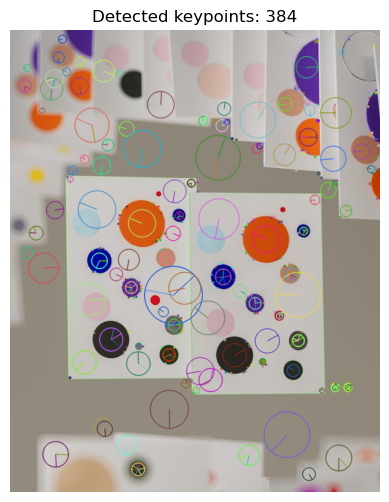

In [38]:
sift = cv2.SIFT_create()


print("SIFT detector parameters (current / default values):")
print('nfeatures: ' + str(sift.getNFeatures()))
print('nOctaveLayers: ' + str(sift.getNOctaveLayers()))
print('contrastThreshold: ' + str(sift.getContrastThreshold()))
print('edgeThreshold: ' + str(sift.getEdgeThreshold()))
print('sigma: ' + str(sift.getSigma()))


keypoints = sift.detect(img_gray, None)

for i, kp in enumerate(keypoints[:10]):
    print(f"  [{i}] pt={kp.pt}, size={kp.size}, angle={kp.angle}, response={kp.response}, octave={kp.octave}, class_id={kp.class_id}")

drawn = cv2.drawKeypoints(color,
                            keypoints, None,
                            flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(drawn, cv2.COLOR_BGR2RGB))
plt.title(f"Detected keypoints: {len(keypoints)}")
plt.axis('off')



Detected 157 keypoints.
  pt=(120.45195007324219, 96.70128631591797), size=28.965118408203125, angle=86.84054565429688, response=0.039206650108098984, octave=590083, class_id=-1


(-0.5, 639.5, 799.5, -0.5)

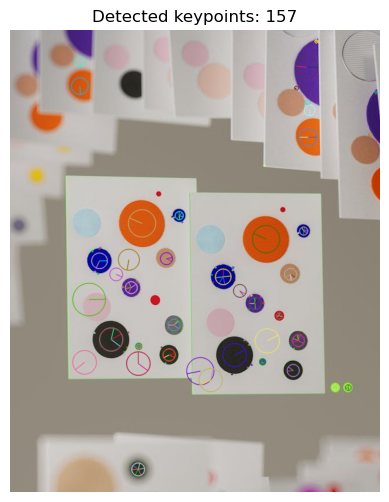

In [ ]:
sift.setContrastThreshold(0.09)
sift.setEdgeThreshold(9)

keypoints = sift.detect(img_gray, None)

kp = keypoints[0]
print(f"  pt={kp.pt}, size={kp.size}, angle={kp.angle}, response={kp.response}, octave={kp.octave}, class_id={kp.class_id}")


drawn = cv2.drawKeypoints(color,
                            keypoints, None,
                            flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(drawn, cv2.COLOR_BGR2RGB))
plt.title(f"Detected keypoints: {len(keypoints)}")
plt.axis('off')

Keypoints: 157
Descriptors shape: (157, 128)
Descriptors dtype: float32
First descriptor (first 10 values): [ 0. 32. 94. 26. 16.  4.  0.  0.  2. 17.]
Selected idx=11, pt=(154.33,399.25), size=27.21, descriptor shape=(128,)


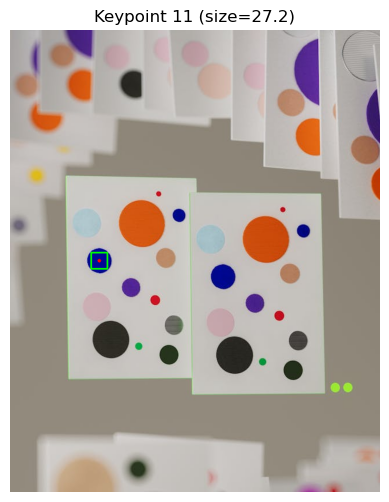

In [34]:
kp_list, descriptors = sift.compute(img_gray, list(keypoints))


print("Keypoints:", 0 if kp_list is None else len(kp_list))
print("Descriptors shape:", None if descriptors is None else descriptors.shape)
print("Descriptors dtype:", None if descriptors is None else descriptors.dtype)
if descriptors is not None and descriptors.size:
    print("First descriptor (first 10 values):", descriptors[0][:10])

    # select keypoint / descriptor by idx (uses existing variables kp_list, descriptors, color)
    idx = 11 # change this index to select a different keypoint

    kp_sel = kp_list[idx]
    desc_sel = descriptors[idx]

    x, y = kp_sel.pt
    size = kp_sel.size if hasattr(kp_sel, 'size') else 1.0

    # rectangle half-size derived from keypoint size (simple: use size/2)
    half = max(1, int(round(size / 2)))

    # integer corner coordinates, clamped to image bounds
    h_img, w_img = color.shape[:2]
    tlx = max(0, min(int(round(x)) - half, w_img - 1))
    tly = max(0, min(int(round(y)) - half, h_img - 1))
    brx = max(0, min(int(round(x)) + half, w_img - 1))
    bry = max(0, min(int(round(y)) + half, h_img - 1))

    # draw on a copy and display
    vis = color.copy()
    cv2.rectangle(vis, (tlx, tly), (brx, bry), (0, 255, 0), 2)   # green rectangle
    cv2.circle(vis, (int(round(x)), int(round(y))), 3, (0, 0, 255), -1)  # red center

    print(f"Selected idx={idx}, pt=({x:.2f},{y:.2f}), size={size:.2f}, descriptor shape={None if desc_sel is None else desc_sel.shape}")
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB))
    plt.title(f"Keypoint {idx} (size={size:.1f})")
    plt.axis('off')

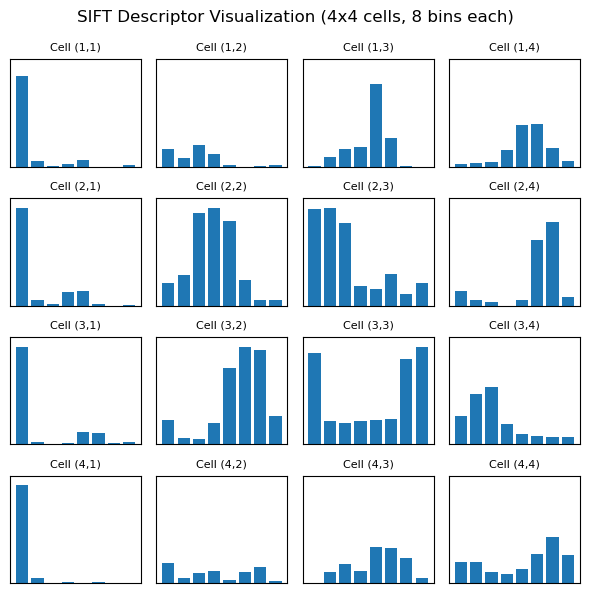

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_sift_descriptor(descriptor):
    """
    Visualize a 128-dimensional SIFT descriptor as a 4x4 grid of 8-bin histograms.
    """
    if len(descriptor) != 128:
        raise ValueError("Descriptor must be 128-dimensional.")

    descriptor = np.array(descriptor).reshape(4, 4, 8)
    fig, axes = plt.subplots(4, 4, figsize=(6, 6))
    fig.suptitle("SIFT Descriptor Visualization (4x4 cells, 8 bins each)")

    for i in range(4):
        for j in range(4):
            ax = axes[i, j]
            hist = descriptor[i, j]
            ax.bar(np.arange(8), hist, width=0.8)
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_ylim(0, max(descriptor.flatten()) * 1.1)
            ax.set_title(f"Cell ({i+1},{j+1})", fontsize=8)
    plt.tight_layout()
    plt.show()

# Example usage:
visualize_sift_descriptor(desc_sel)


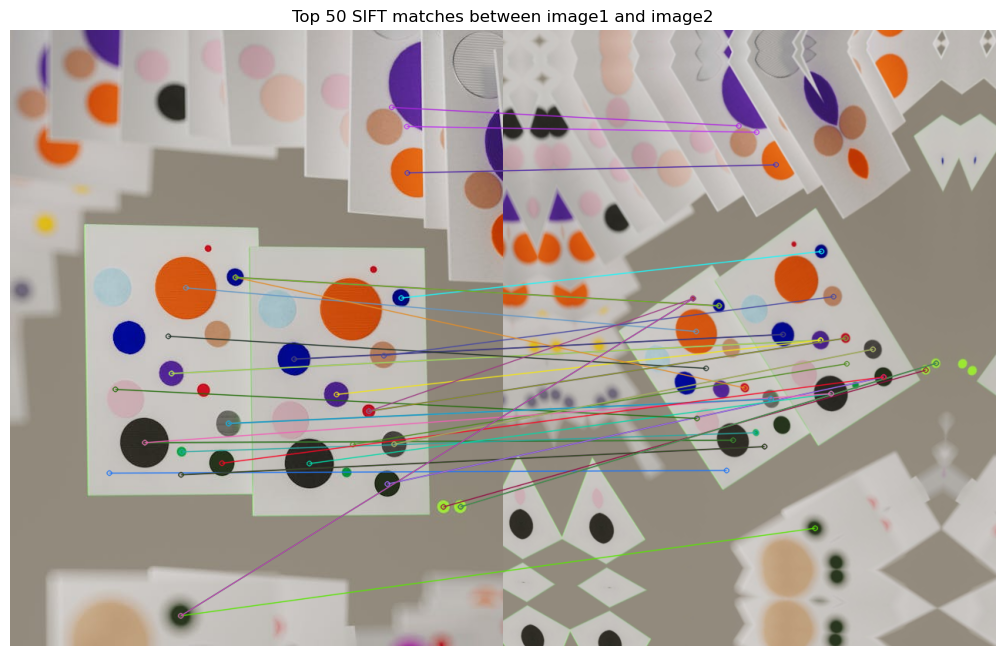

In [ ]:
image1 = color.copy()

# build a chain of geometric transforms (rotate+scale, affine shear, perspective)
angle = 30
scale = 0.9
M_rot = cv2.getRotationMatrix2D((w_img/2, h_img/2), angle, scale)
tmp = cv2.warpAffine(image1, M_rot, (w_img, h_img), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT)

# small affine shear
pts_src = np.float32([[0, 0], [w_img - 1, 0], [0, h_img - 1]])
pts_dst = np.float32([[w_img * 0.05, h_img * 0.03],
                      [w_img * 0.95, h_img * 0.0],
                      [w_img * 0.12, h_img * 0.95]])
A = cv2.getAffineTransform(pts_src, pts_dst)
tmp2 = cv2.warpAffine(tmp, A, (w_img, h_img), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT)

# perspective warp (convex quad)
src = np.float32([[0, 0], [w_img - 1, 0], [w_img - 1, h_img - 1], [0, h_img - 1]])
dst = np.float32([[w_img * 0.02 + 10, h_img * 0.05],
                  [w_img * 0.95 - 10, h_img * 0.02],
                  [w_img * 0.88, h_img * 0.95 - 10],
                  [w_img * 0.12 + 5, h_img * 0.90]])
P = cv2.getPerspectiveTransform(src, dst)
image2 = cv2.warpPerspective(tmp2, P, (w_img, h_img), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT)

# save transformed image to disk
cv2.imwrite('example-image-transformed.jpg', image2)

# prepare grayscale images for SIFT
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# detect and compute SIFT on the transformed image
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

# ensure we have descriptors for both images
if descriptors is None or descriptors2 is None:
    print("No descriptors found in one of the images. descriptors is None:", descriptors is None, "descriptors2 is None:", descriptors2 is None)
else:
    # brute-force matching with cross-check
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    matches = bf.match(descriptors, descriptors2)
    matches = sorted(matches, key=lambda m: m.distance)

    # draw top 50 matches
    topn = min(50, len(matches))
    matched_img = cv2.drawMatches(image1, keypoints, image2, keypoints2, matches[:topn], None,
                                  flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # save and display matches
    cv2.imwrite('example-image-matches.jpg', matched_img)

    import matplotlib.pyplot as plt
    plt.figure(figsize=(14, 8))
    plt.imshow(cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB))
    plt.title(f"Top {topn} SIFT matches between image1 and image2")
    plt.axis('off')
    plt.show()